In [189]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualization of Data Plots

In [2]:
def vis_plots(data):
    '''Plots one or more images or x-rays. Parameters:
        -data: a dictionary with the names as keys and image as values.
    '''

    # calculate num of columns and rows
    num_vis = len(data)
    if num_vis % 4 == 0:
        cols = 4
        rows = 1
    else:
        cols = 3
        rows = int(np.ceil(num_vis / cols))

    # initiate subplots
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axs = axs.flatten()

    # iterate models to display x-rays images
    for i, (name,image) in enumerate(data.items()):
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title(f"{name}")
    
    # remove not used axes
    for ax in range(num_vis, len(axs)):
        fig.delaxes(axs[ax])

    # show plot
    plt.tight_layout()
    plt.show()

# Confusion Matrix

In [190]:
def plot_confusion_matrices(models_data, models_to_show, classes=None):
    '''
    Plot one or more confusion matrices 
    
    Parameters:
    - models data: a dictionary with each model and its respective data
    - models_to_show: a list of the models confusion matrices needed to be displayed
    - classes: a list of the classes ('Benigant', 'Malignant')
    '''
    if len(models_to_show) == 1:
        # gets model's data
        model_name = models_to_show[0]
        cm_data = models_data[model_name]["metrics"]["confusion_matrix"]
        # creates display for confusion matrix 
        # code inspiration from https://medium.com/@eceisikpolat/plot-and-customize-multiple-confusion-matrices-with-matplotlib-a19ed00ca16c
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_data, display_labels=classes)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()
    else:
        num_models = len(models_to_show)
        if num_models % 2 == 0:
            cols = 2
            rows = int(num_models/cols)
        else:
            cols = 3
            rows = int(np.ceil(num_models/cols))
        fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
        axs = axs.flatten()

        # iterate models to display confusion matrices
        for i, model in enumerate(models_to_show):
            cm_data = models_data[model]["metrics"]["confusion_matrix"]
            disp = ConfusionMatrixDisplay(confusion_matrix=cm_data, display_labels=classes)
            disp.plot(ax=axs[i], cmap=plt.cm.Blues)
            axs[i].set_title(f"{model}")

        # remove not used axes
        for ax in range(num_models, len(axs)):
            fig.delaxes(axs[ax])

        # show plot
        plt.tight_layout()
        plt.show()



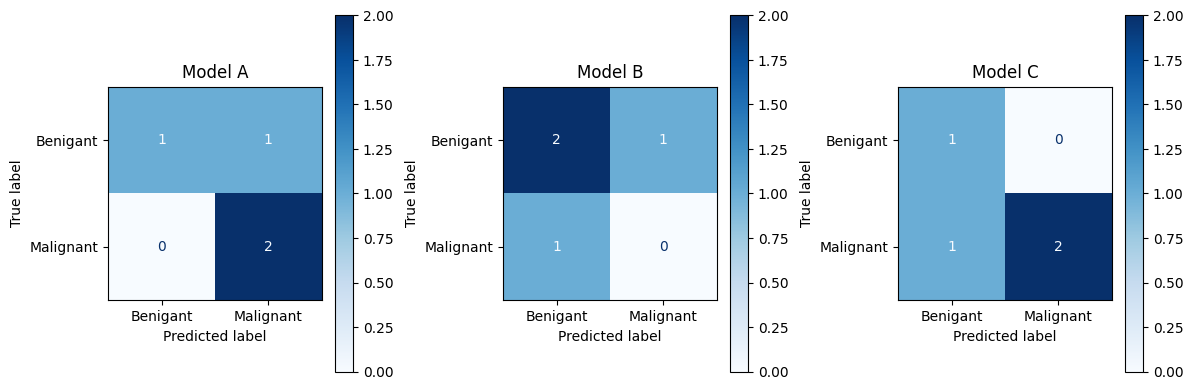

In [191]:
models_data = [
    {'name': 'Model A', 'y_true': [0, 1, 0, 1], 'y_pred': [0, 1, 1, 1]},
    {'name': 'Model B', 'y_true': [0, 1, 0, 0], 'y_pred': [0, 0, 0, 1]},
    {'name': 'Model C', 'y_true': [1, 1, 1, 0], 'y_pred': [1, 0, 1, 0]},
    {'name': 'Model D', 'y_true': [1, 0, 1, 0], 'y_pred': [1, 0, 1, 0]}
]

cm_data = {'Model A': {"metrics": {"confusion_matrix": confusion_matrix( [0, 1, 0, 1],  [0, 1, 1, 1])}},
          'Model B': {"metrics": {"confusion_matrix": confusion_matrix( [0, 1, 0, 0],  [0, 0, 0, 1])}},
          'Model C': {"metrics": {"confusion_matrix": confusion_matrix( [1, 1, 1, 0],  [1, 0, 1, 0])}},
          'Model D': {"metrics": {"confusion_matrix": confusion_matrix( [1, 0, 1, 0],  [1, 0, 1, 0])}}
          }




class_names = ['Benigant', 'Malignant']


# Show only one (Model B at index 1)
plot_confusion_matrices(cm_data, ["Model A", "Model B", "Model C"], class_names)

# Line Plot

In [192]:
def line_plot(models_data, models_to_show, metrics):
    '''
    Plot one or more metrics in a line plot 
    
    Parameters:
    - models data: a dictionary with each model and its respective data
    - models_to_show: a list of the models confusion matrices needed to be displayed
    - metrics: a list of the metrics to add at the line plot.
    '''

    # plots each metric for each model
    for metric in metrics:
        y_vals = []
        for model in models_to_show:
            y_vals.append(models_data[model]["metrics"][metric]) 
        plt.plot(models_to_show, y_vals, label=metric, marker='o')
        print(y_vals)

    # Add labels to the plot
    plt.xlabel('Models')
    plt.ylabel('Performance Score')
    plt.title('Performance Metrics Comparison by Model')
    plt.legend()
    
    # Show plot
    plt.show()

[0.8, 0.4, 0.9, 0.4]
[0.7, 0.7, 0.5, 0.6]
[0.7, 0.5, 0.7, 0.9]


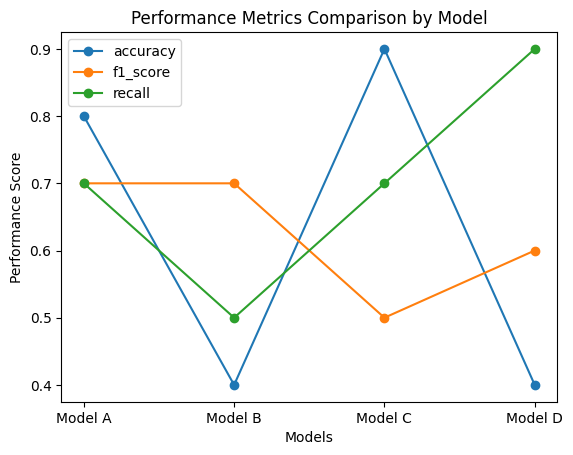

In [193]:
cm_data = {'Model A': {"metrics": {"accuracy": 0.8, "f1_score": 0.7, "recall": 0.7}},
          'Model B': {"metrics": {"accuracy": 0.4, "f1_score": 0.7, "recall": 0.5}},
          'Model C': {"metrics": {"accuracy": 0.9, "f1_score": 0.5, "recall": 0.7}},
          'Model D': {"metrics": {"accuracy": 0.4, "f1_score": 0.6, "recall": 0.9}}
          }
line_plot(cm_data, ["Model A", "Model B", "Model C", "Model D"], ["accuracy", "f1_score", "recall"])

# Radar plot

In [194]:
def radar_chart(models_data, models_to_show, metrics):
    # number of metrics
    num_metrics = len(metrics)
    
    # calculate the angles of each axis
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]

    # create plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # plots each model for each metric
    for model in models_to_show:
        y_vals = []
        for metric in metrics:
            y_vals.append(models_data[model]["metrics"][metric]) 
        y_vals.append(y_vals[0])
        print(f"Model: {model} | angles: {len(angles)} | y_vals: {len(y_vals)}")
        ax.plot(angles, y_vals, label=model, marker='o')
        ax.fill(angles, y_vals, alpha=0.1)

    # Set labels for each metric
    ax.set_xticks(angles[:-1]) #removes closing tick
    ax.set_xticklabels(metrics)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8'])

    # center axis
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    
    plt.title('Model Performance Comparison by Metrics')
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()    

Model: Model A | angles: 4 | y_vals: 4
Model: Model B | angles: 4 | y_vals: 4
Model: Model C | angles: 4 | y_vals: 4
Model: Model D | angles: 4 | y_vals: 4


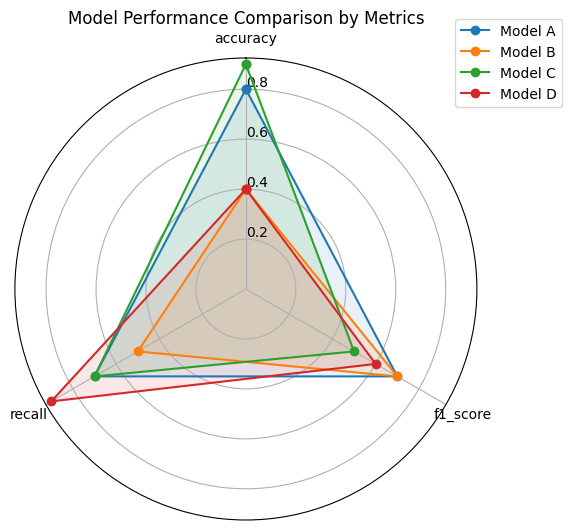

In [195]:

radar_chart(cm_data, ["Model A", "Model B", "Model C", "Model D"], ["accuracy", "f1_score", "recall"])

# ROC

In [199]:
# The follwoing data  for creating fake data for the ROC was generated by ChatGPT
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create synthetic binary classification data
X, y = make_classification(n_samples=1000, n_classes=2, n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# List of models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM (probability=True)': SVC(probability=True)
}
data = {'Logistic Regression': {"metrics": {"roc_auc": 0.4, "f1_score": 0.6, "recall": 0.9}},
       'Random Forest': {"metrics": {"roc_auc": 0.5, "f1_score": 0.6, "recall": 0.9}},
        'SVM (probability=True)': {"metrics": {"roc_auc": 0.8, "f1_score": 0.6, "recall": 0.9}}
       }

for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    data[name]["labels"] = {"y_true": y_test, "y_probs": y_probs} #mine to get ys


In [200]:
data

{'Logistic Regression': {'metrics': {'roc_auc': 0.4,
   'f1_score': 0.6,
   'recall': 0.9},
  'labels': {'y_true': array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
          0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
          0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
          0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
          1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
          1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
          0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
          1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
          0, 1, 1, 1, 1, 0, 0, 1]),
   'y_probs': ar

In [201]:
def ROC_curve(models_data, models_to_show):
    for model in models_to_show:
        # calculate false positive rate and true positive rate using the ROC curve 
        fpr, tpr, _ = roc_curve(models_data[model]["labels"]["y_true"], models_data[model]["labels"]["y_probs"])
        # get roc_auc value 
        roc_auc = models_data[model]["metrics"]["roc_auc"]

        # initiate plot
        plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

    # format plot 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curves Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    plt.show()

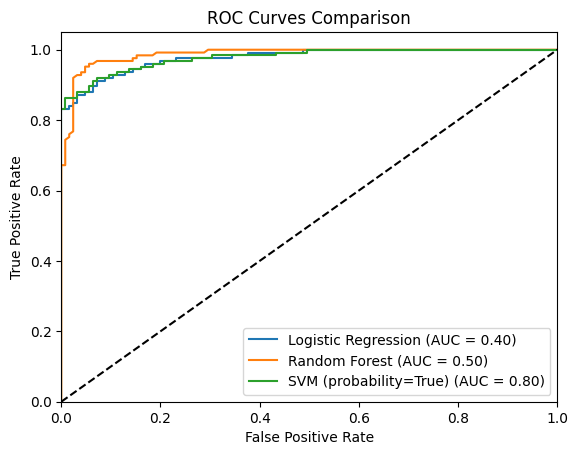

In [202]:
ROC_curve(data, ['Logistic Regression', 'Random Forest', 'SVM (probability=True)'])

# Learning Curves

In [2]:
import json 
with open('../Outputs/models_data.json', 'r') as file:
        data = json.load(file)

In [55]:
data.keys()

dict_keys(['Custom CNN 10Baseline Basic Preporcessing', 'Custom CNN 10 - Baseline Basic Preporcessing', 'Custom CNN 10 - All Preporcessing Techniques', 'Custom CNN 10 - No Background removal', 'Custom CNN 10 - No Crop', 'Custom CNN 10 - No Noise reduction', 'Custom CNN 10 - No Contrast enhancement', 'Custom CNN 10 - No Edge enhancement', 'Custom CNN 10 - No Lbp texturizer'])

In [96]:
import matplotlib.pyplot as plt
import numpy as np
def learning_curves(models_data, models_to_show, metrics, colors):
    '''
        Plot one or more model with one or more metrics from the model's history  
        
        Parameters:
        - models data: a dictionary with each model and its respective data
        - models_to_show: a list of the models confusion matrices needed to be displayed
        - metrics: a list of the metrics.
        - a list of colors of the same size of metrics
    '''
    # verify the number of colors matches the metrics length
    if len(colors) != len(metrics):
        raise ValueError("Your list of colors should match the size of the list of metrics")
    

    # calculate num of columns and rows
    num_vis = len(models_to_show)
    if num_vis % 4 == 0:
        cols = 4
        rows = int(num_vis / cols)
    else:
        cols = 3
        rows = int(np.ceil(num_vis / cols))

    
    # set font size for plots
    font = {'size': 8}
    plt.rc('font', **font)
    
    # initiate subplots
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 4))
    axs = np.atleast_1d(axs).flatten()
    
    # iterate models to display lerning curves
    for i, model in enumerate(models_to_show):
        # get model name
        m_name = model.split(" - ")[1]
        # plots each metric for each model 
        for metric, c in zip(metrics, colors):
            values = models_data[model]["history"][metric]
            val_values = models_data[model]["history"]["val_" + metric]
            axs[i].plot(range(1, len(values) + 1), values, color=c, label=metric)
            axs[i].plot(range(1, len(val_values) + 1), val_values, color=c, linestyle='dashed', label="val_" + metric)
        
            # Add labels to the plot
            axs[i].set_xlabel('Epochs')
            axs[i].set_ylabel('Learning Performance')
            axs[i].set_title(m_name)
            axs[i].legend()

    # remove not used axes
    for ax in range(num_vis, len(axs)):
        fig.delaxes(axs[ax])
    
    # Show plot
    plt.tight_layout()
    plt.show()


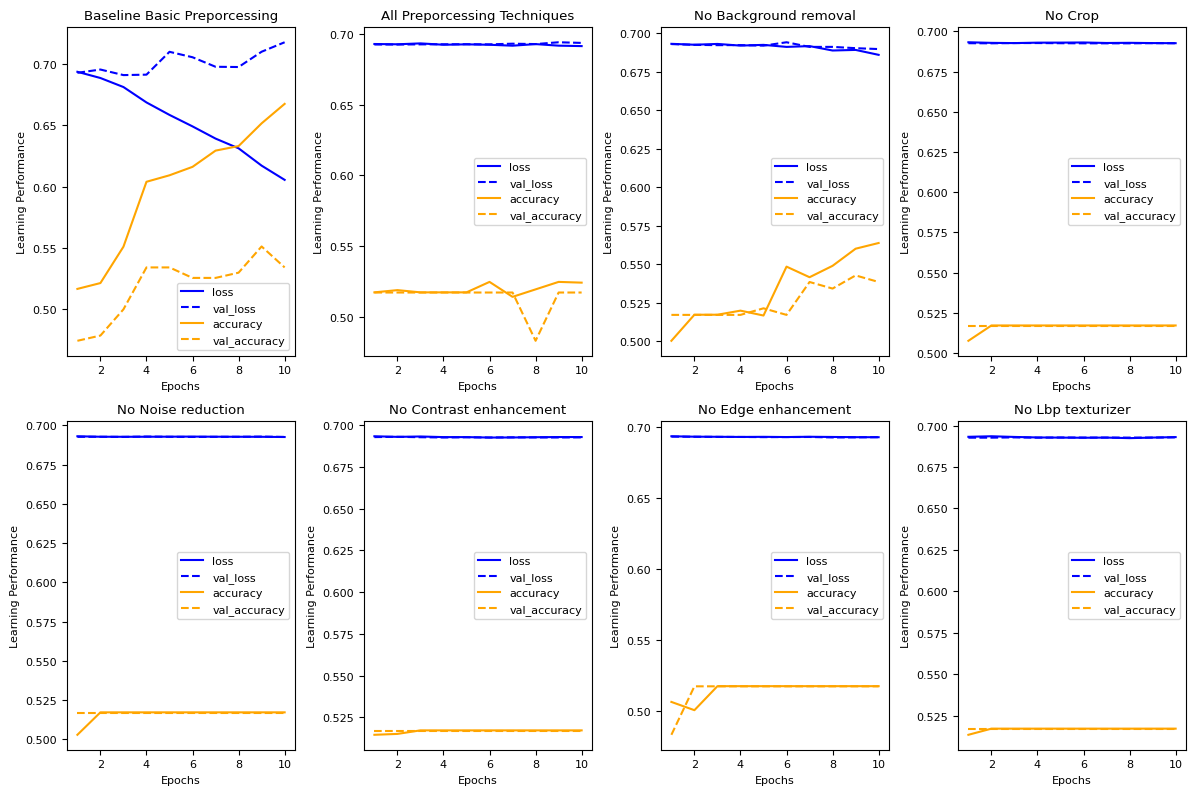

In [100]:
learning_curves(data, list(data.keys())[1:], ["loss", "accuracy"], ["blue", "orange"])